# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [40]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [41]:
# Import Data
# Create path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 6/04-2025 Billionaire Statistics'
# Import the merged data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Original data', 'Cancelled_Diverted_2023.csv'), index_col = False)

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(1)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Cancelled,Diverted,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,"New York, NY",Evening,0.0,0,No Departure Delay,ITH,"Ithaca/Cortland, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


### 2. Create Subset

In [43]:
# Create a subset with the desired columns
df_sub = df[['FlightDate', 'Dep_Delay']]

In [44]:
# Group by date with the mean of the avg delay
df_sub = df_sub.groupby('FlightDate')['Dep_Delay'].mean()

In [45]:
df_sub.head()

FlightDate
2023-01-01    15.994819
2023-01-02    10.188078
2023-01-03    12.539586
2023-01-04     3.752497
2023-01-05     8.754032
Name: Dep_Delay, dtype: float64

In [46]:
# convert df_sub series into data frame
df_sub = df_sub.reset_index()
df_sub

,FlightDate,Dep_Delay
0,2023-01-01,15.994819
1,2023-01-02,10.188078
2,2023-01-03,12.539586
3,2023-01-04,3.752497
4,2023-01-05,8.754032
5,2023-01-06,13.544715
6,2023-01-07,21.605634
7,2023-01-08,11.119565
8,2023-01-09,15.074534
9,2023-01-10,7.445498


In [47]:
df_sub.shape

(365, 2)

In [48]:
df_sub.columns

Index(['FlightDate', 'Dep_Delay'], dtype='object')

In [49]:
type(df_sub)

pandas.core.frame.DataFrame

In [50]:
from datetime import datetime
df_sub['datetime'] = pd.to_datetime(df_sub['FlightDate'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['FlightDate'], axis=1, inplace=True)
df_sub.head()

,Dep_Delay
datetime,
2023-01-01,15.994819
2023-01-02,10.188078
2023-01-03,12.539586
2023-01-04,3.752497
2023-01-05,8.754032


In [38]:
df_sub.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'dep delay.csv'))

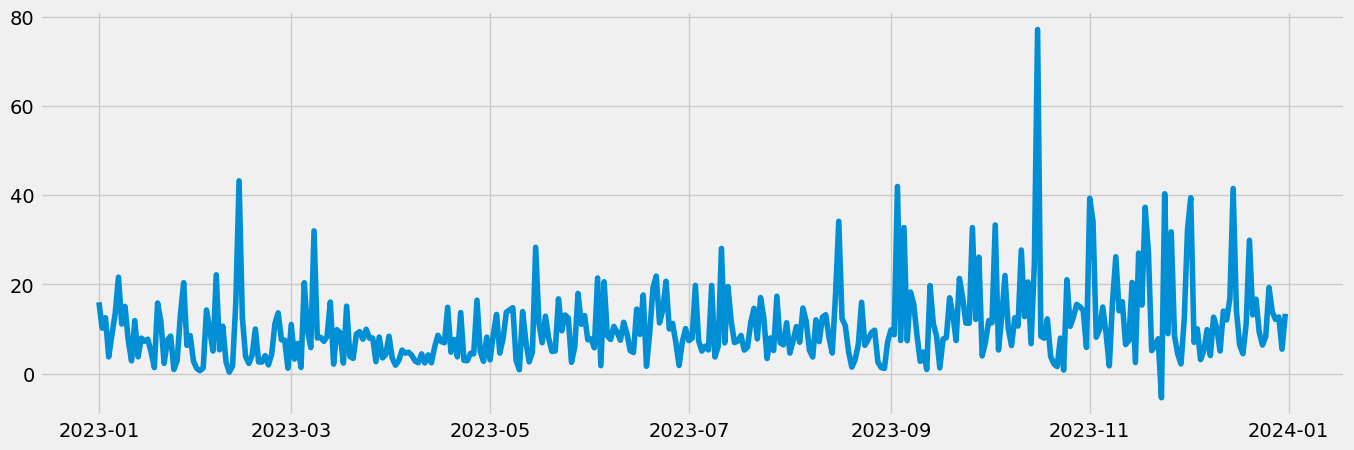

In [25]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_sub)

In [51]:
df_sub.isnull().sum()

Dep_Delay    0
dtype: int64

In [32]:
dups = df_sub.duplicated()
dups.sum()

np.int64(1)

#### There isnt a clear trend that can be spotted from this graph. This spikes on certain  days can be weekends or holidays where there are generaly more flights leading to delays. On one of the days the delay was almost double than the usual average

### 3. Decomposition

In [53]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_sub, model='additive')

In [54]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

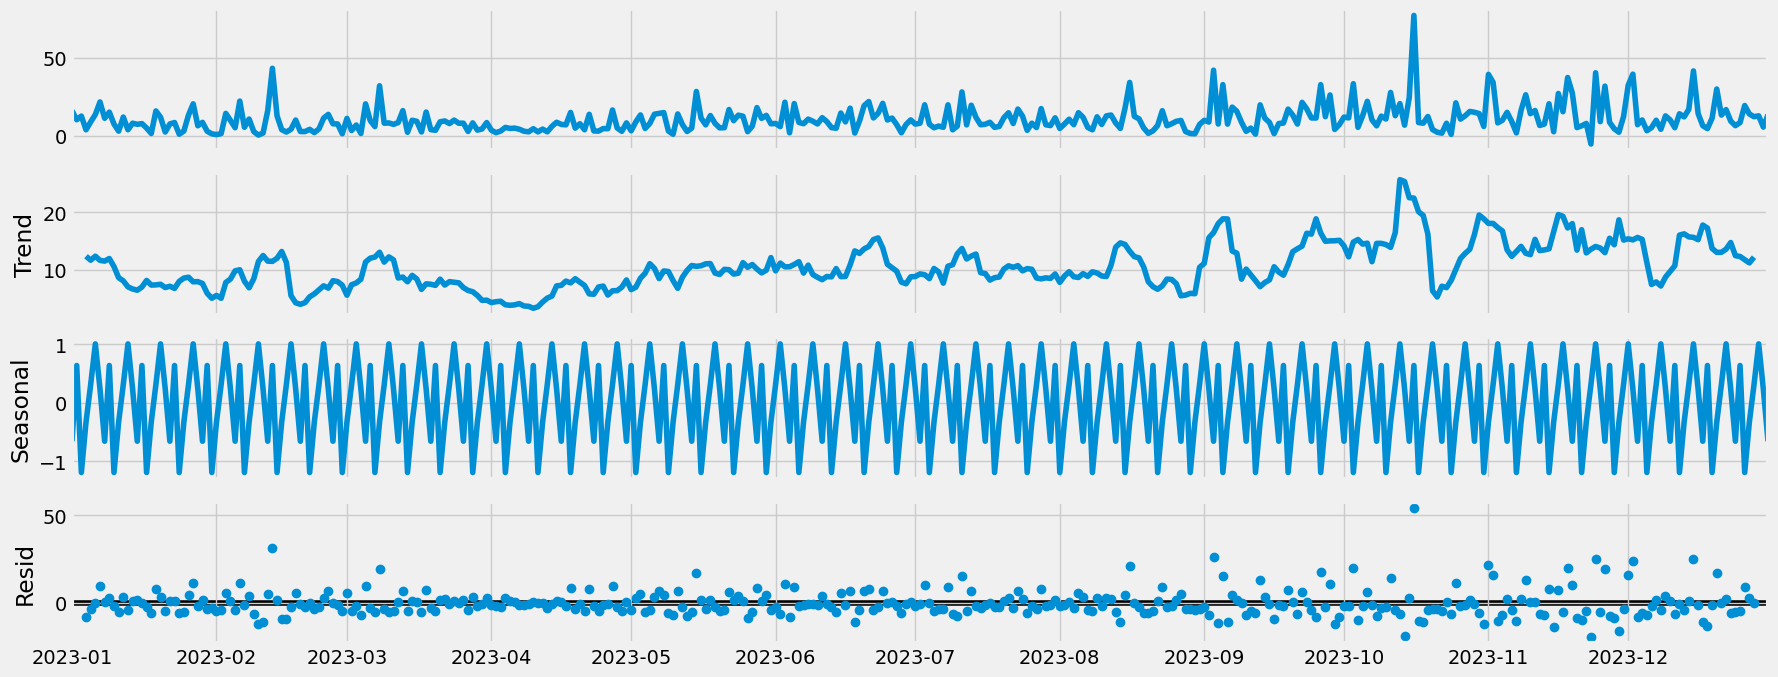

In [55]:
# Plot the separated components

decomposition.plot()
plt.show()

#### Observations:
##### Trend: Peaks in delays might appear around summer (June–August) and winter holidays (December), which are known high-travel periods.
##### Seasonal: Weekly patterns may dominate (e.g., higher weekend delays).
##### Residual: dates with extreme residuals (e.g., August 16, 2023: 34.1 min; October 16, 2023: 77.1 min). These could reflect disruptions like storms or system outages.

#### 4. Testing for stationarity

In [57]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df_sub['Dep_Delay'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -2.204583
p-value                          0.204586
Number of Lags Used             17.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64


##### The Test Statistic is greated than the critical value sugggets the data is **non-stationary**. The p-value of 0.20 is more than 0.05 fails to reject the null hypotheis of non-stationary. 

##### departure delay data is non-stationary. This aligns with typical time series behavior where:

- Trends exist (e.g., delays increase during holidays).

- Seasonality is present (weekly/monthly patterns).

#### 5. Check for Autocorrelation 

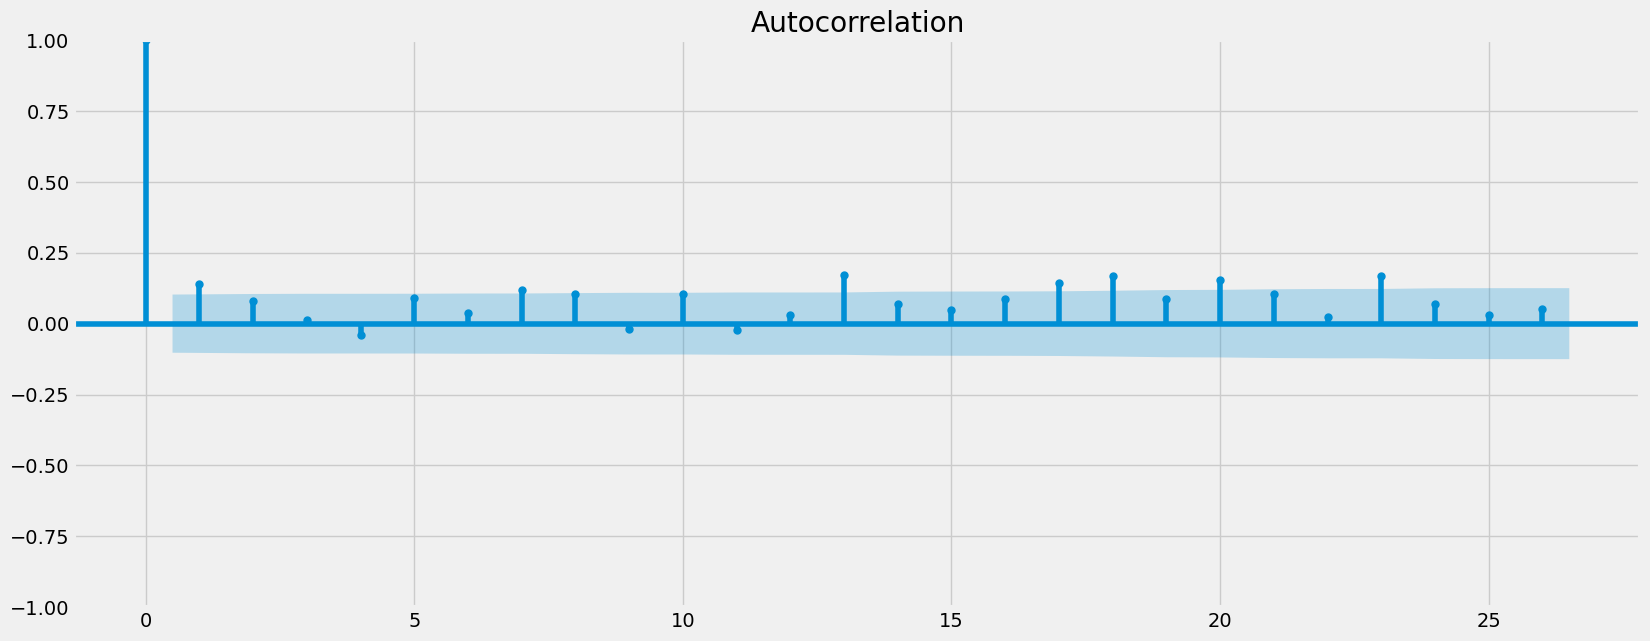

In [58]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub)
plt.show()